## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll further investigate how to tune your personal logistic regression implementation, as well as that of sci-kit learn in order to produce better models.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, you were able to verify your manual logistic regression model output using sci-kit learn. However, that model did not include an intercept or any regularization. In this investigative lab, you will analyze the impact these two tuning parameters.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [33]:
#Your code here
df = pd.read_csv('heart.csv')

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implement a standard train-test split.  
**For consistency of results, use random_state=17.**

In [35]:
#Your code here
X = df[df.columns[:-1]]
y = df['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=17)

## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [37]:
# Your code here
def predict_y(X,w):
    return X.dot(w)

In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [39]:
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    
    weights_col= pd.DataFrame(initial_weights)
    weights = initial_weights
    
    iter = 0
   
    while iter<max_iterations:
        
        predictions = sigmoid(np.dot(X, weights))
        
        error_vector = y - predictions
        
        gradient = np.dot(X.transpose(),error_vector)
        
        weights += alpha*gradient
        
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
        
        iter += 1
    
    return weights

In [49]:
weights = grad_desc(X_train, y_train, 100000, 0.001)

In [50]:
weights

array([ 0.77807749, -2.17906719,  2.60298197, -2.64296043, -2.41080021,
        0.02614745,  1.3566145 ,  6.73475706, -1.10155675, -3.92267099,
        0.71334374, -3.38852792, -1.78113394])

In [51]:
model = LogisticRegression(fit_intercept=False, C=1e16)
reg = model.fit(X_train, y_train)
reg.coef_


/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 0.77784048, -2.17889622,  2.60276554, -2.64319383, -2.40927977,
         0.02622115,  1.35660894,  6.73431833, -1.10158059, -3.92221991,
         0.71328729, -3.38839625, -1.78116783]])

## Now use your algorithm to make [probability] predictions on the test set

In [72]:
#Your code here
y_score = sigmoid(X_test.dot(weights))
fpr, tpr, thresholds = roc_curve(y_test, y_score)

## Create an ROC curve for your predictions

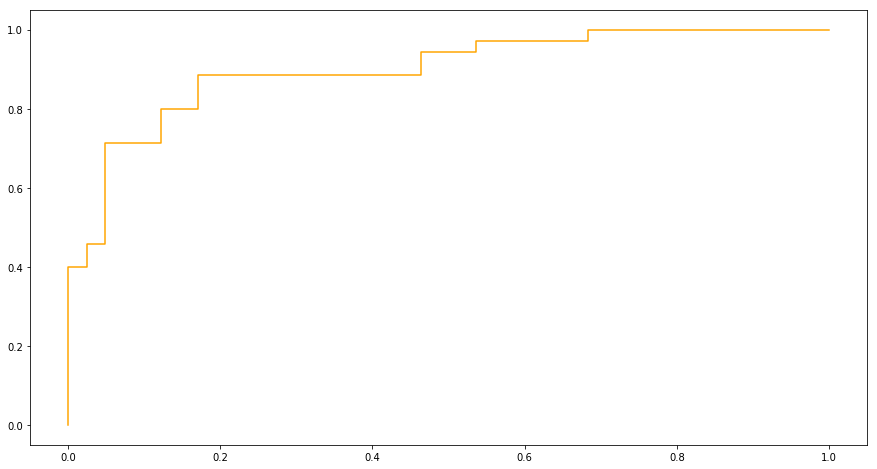

In [73]:
#Your code here
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, color='orange')

In [74]:
print('AUC: ', auc(fpr,tpr))

AUC:  0.8996515679442508


## Update your ROC curve to not only include a graph of the test set, but one of the train set

In [75]:
# Your code here
y_score_train = sigmoid(X_train.dot(weights))
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score_train)

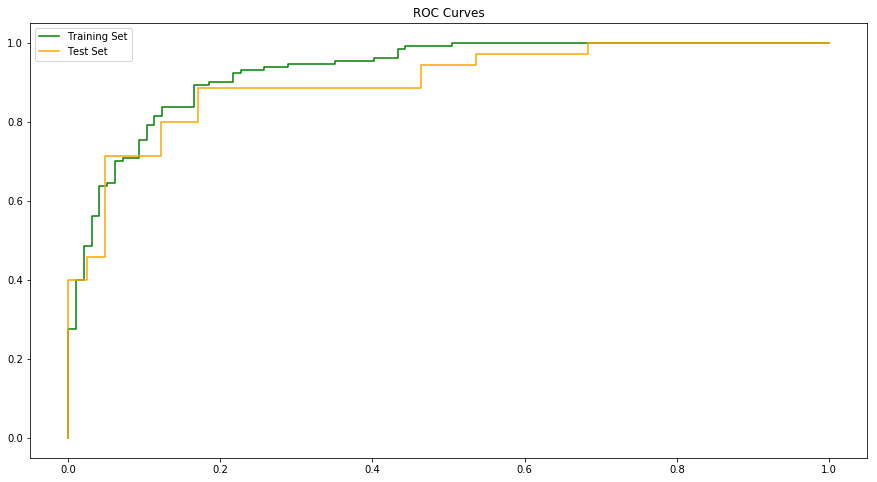

In [79]:
plt.figure(figsize=(15,8))
plt.plot(fpr_train, tpr_train, color='green', label='Training Set')
plt.plot(fpr, tpr, color='orange', label='Test Set')
plt.legend()
plt.title('ROC Curves')
plt.show()

In [80]:
print('AUC Training Set: ', auc(fpr_train, tpr_train))

AUC Training Set:  0.9291038858049168


## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

In [94]:
# Your code here

def conf_matrix(y_true, y_pred):
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    y_true = list(y_true)
    y_pred = list(y_pred)
    
    for i in range(0, len(y_true)):
    
        if y_true[i] - round(y_pred[i]) == 0:
            if y_true[i] == 1:
                TP += 1
            else:
                TN += 1

        elif y_true[i] - round(y_pred[i]) == 1:
            FN +=1

        elif y_true[i] - round(y_pred[i]) == -1:
            FP +=1

        
    confusion_matrix = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}
    return confusion_matrix
    

            



In [95]:
conf_matrix(y_test, y_score)

{'TP': 31, 'TN': 32, 'FP': 9, 'FN': 4}

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [110]:
# Your code here
model = LogisticRegression(fit_intercept=False, C=1e16)
reg = model.fit(X_train, y_train)
reg.coef_


/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 0.77784048, -2.17889622,  2.60276554, -2.64319383, -2.40927977,
         0.02622115,  1.35660894,  6.73431833, -1.10158059, -3.92221991,
         0.71328729, -3.38839625, -1.78116783]])

In [101]:
y_score = np.round(reg.predict(X_test))

In [102]:
y_score

array([1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1.])

## Create an ROC Curve for the sci-kit learn model

In [103]:
#Your code here
fpr, tpr, thresholds = roc_curve(y_test, y_score)

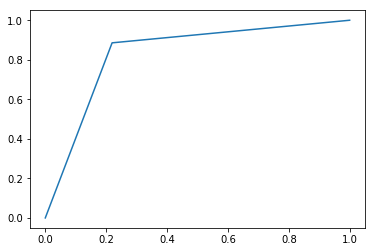

In [104]:
plt.plot(fpr, tpr)

## As before add an ROC curve to the graph for the train set as well

In [106]:
#Your code here

Y_score_train = np.round(reg.predict(X_train))
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score_train)

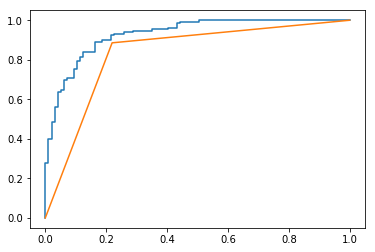

In [108]:
plt.plot(fpr_train, tpr_train)
plt.plot(fpr, tpr)

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

In [111]:
# Your code here

model2 = LogisticRegression(fit_intercept=True, C=1e16)
reg2 = model2.fit(X_train, y_train)
reg2.coef_


/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-5.36853858e-01, -2.38929325e+00,  2.45603829e+00,
        -2.69593202e+00, -3.01782152e+00,  2.62494593e-03,
         1.05555253e+00,  5.14694724e+00, -1.29756229e+00,
        -4.75395924e+00,  3.09790654e-01, -3.33740015e+00,
        -2.30092517e+00]])

In [112]:
y_score_test_intercept = np.round(reg2.predict(X_test))

In [114]:
fpr_intercept, tpr_intercept, thresholds = roc_curve(y_test, y_score_test_intercept)

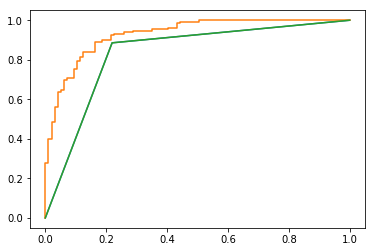

In [116]:
plt.plot(fpr_intercept, tpr_intercept)
plt.plot(fpr_train, tpr_train)
plt.plot(fpr, tpr)

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

AUC:  0.9221649484536083
AUC:  0.9222442505947661
AUC:  0.922283901665345
AUC:  0.922283901665345
AUC:  0.922283901665345
AUC:  0.922283901665345
AUC:  0.922283901665345
AUC:  0.922283901665345


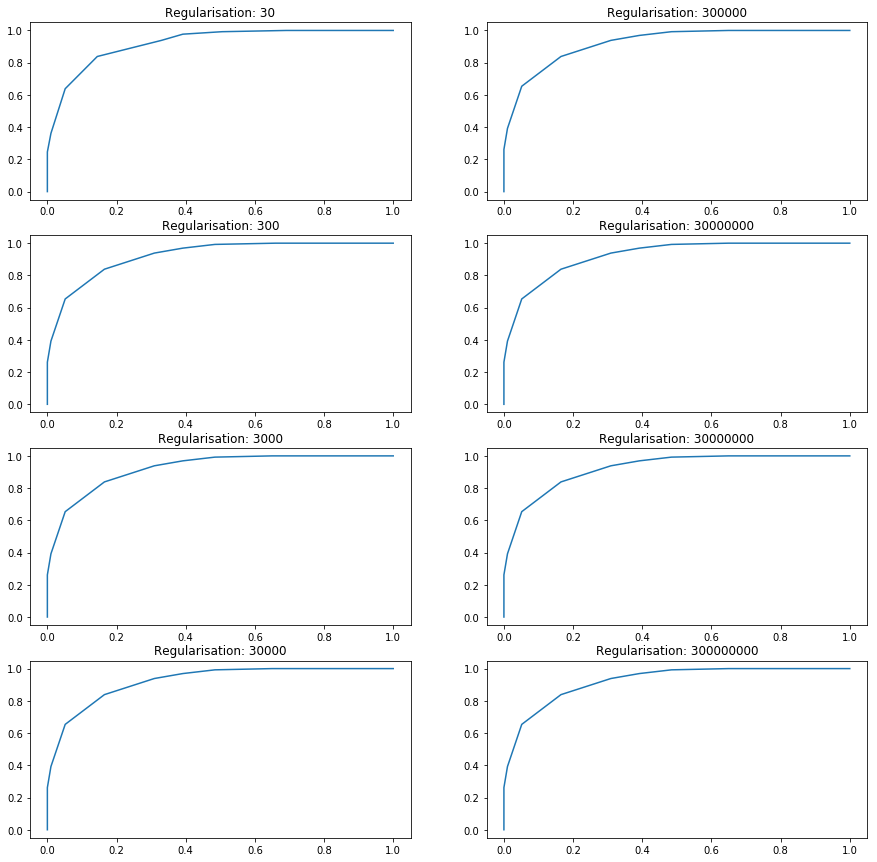

In [126]:
# Your code here
fig, axes = plt.subplots(4,2, figsize=(15,15))

for key, c in enumerate([30, 300, 3000, 30000, 300000, 30000000, 30000000, 300000000]):
    i = key%4
    j = key//4
    ax = axes[i][j]
    model = LogisticRegression(fit_intercept=True, C=c)
    reg = model.fit(X_train, y_train)
    y_score = np.round(reg.decision_function(X_train))
    fpr, tpr, thresholds = roc_curve(y_train, y_score)
    print('AUC: ', auc(fpr, tpr))
    ax.plot(fpr, tpr, label=f"Regularisation: {c}")
    ax.set_title(f"Regularisation: {c}")
    

    

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

#Your response here
Does not impact a huge amount

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.